## 6.01 - Supervised Learning Model Comparison

Recall the "data science process."

1. Define the problem.
2. Gather the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus mostly on creating (and then comparing) many regression and classification models. Thus, we'll define the problem and gather the data for you.
Most of the questions requiring a written response can be written in 2-3 sentences.

### Step 1: Define the problem.

You are a data scientist with a financial services company. Specifically, you want to leverage data in order to identify potential customers.

If you are unfamiliar with "401(k)s" or "IRAs," these are two types of retirement accounts. Very broadly speaking:
- You can put money for retirement into both of these accounts.
- The money in these accounts gets invested and hopefully has a lot more money in it when you retire.
- These are a little different from regular bank accounts in that there are certain tax benefits to these accounts. Also, employers frequently match money that you put into a 401k.
- If you want to learn more about them, check out [this site](https://www.nerdwallet.com/article/ira-vs-401k-retirement-accounts).

We will tackle one regression problem and one classification problem today.
- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.

Check out the data dictionary [here](http://fmwww.bc.edu/ec-p/data/wooldridge2k/401KSUBS.DES).

### NOTE: When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable. When predicting `e401k`, you may use the entire dataframe if you wish.

### Step 2: Gather the data.

##### 1. Read in the data from the repository.

In [1]:
import pandas as pd

In [8]:
df = pd.read_csv("C:\\Users\\taylo\\Desktop\\GA\\DSI-Assignments\\6.01-lab-supervised_learning_models\\401ksubs.csv")

In [9]:
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [10]:
df.isnull().sum()

e401k     0
inc       0
marr      0
male      0
age       0
fsize     0
nettfa    0
p401k     0
pira      0
incsq     0
agesq     0
dtype: int64

In [11]:
df.describe()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
count,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000,9275.000000
mean,0.392129,39.254641,0.628571,0.204420,41.080216,2.885067,19.071675,0.276226,0.254340,2121.192483,1793.652722
std,0.488252,24.090002,0.483213,0.403299,10.299517,1.525835,63.963838,0.447154,0.435513,3001.469424,895.648841
min,0.000000,10.008000,0.000000,0.000000,25.000000,1.000000,-502.302000,0.000000,0.000000,100.160100,625.000000
25%,0.000000,21.660000,0.000000,0.000000,33.000000,2.000000,-0.500000,0.000000,0.000000,469.155600,1089.000000
50%,0.000000,33.288000,1.000000,0.000000,40.000000,3.000000,2.000000,0.000000,0.000000,1108.091000,1600.000000
75%,1.000000,50.160000,1.000000,0.000000,48.000000,4.000000,18.449500,1.000000,1.000000,2516.025500,2304.000000
max,1.000000,199.041000,1.000000,1.000000,64.000000,13.000000,1536.798000,1.000000,1.000000,39617.320000,4096.000000


##### 2. What are 2-3 other variables that, if available, would be helpful to have?

In [ ]:
#Looking to predict their income
1- Years on the job
2- Education level
3- Job level (entry, management)

##### 3. Suppose a peer recommended putting `race` into your model in order to better predict who to target when advertising IRAs and 401(k)s. Why would this be an unethical decision?

In [ ]:
This would be unethical because we cannot use racial data for targeting factors in a way that perpetuates systemic racism. 

## Step 3: Explore the data.

##### 4. When attempting to predict income, which feature(s) would we reasonably not use? Why?

In [13]:
df.columns

Index(['e401k', 'inc', 'marr', 'male', 'age', 'fsize', 'nettfa', 'p401k',
       'pira', 'incsq', 'agesq'],
      dtype='object')

In [ ]:
#We would reasonably want to use all of the features as I believe they would be helpful for predicting income. 

##### 5. What two variables have already been created for us through feature engineering? Come up with a hypothesis as to why subject-matter experts may have done this.
> This need not be a "statistical hypothesis." Just brainstorm why SMEs might have done this!

In [ ]:
The variables that have been created for us through feature engineering are incsq and agesq. These might have been created because a linear relationship between age and income to retirement might not be as relevant as a quadratic relatioship between age and income and retirement. 

##### 6. Looking at the data dictionary, one variable description appears to be an error. What is this error, and what do you think the correct value would be?

In [14]:
df.dtypes

e401k       int64
inc       float64
marr        int64
male        int64
age         int64
fsize       int64
nettfa    float64
p401k       int64
pira        int64
incsq     float64
agesq       int64
dtype: object

In [ ]:
This error seems to be the age, and that error is that it is listed as age^2 whe-

## Step 4: Model the data. (Part 1: Regression Problem)

Recall:
- Problem: What features best predict one's income?
- When predicting `inc`, you should pretend as though you do not have access to the `e401k`, the `p401k` variable, and the `pira` variable.

##### 7. List all modeling tactics we've learned that could be used to solve a regression problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific regression problem and explain why or why not.

In [ ]:
- linear regression
-MLR
-random forest
-bagging
-bootstrapping
-

##### 8. Regardless of your answer to number 7, fit at least one of each of the following models to attempt to solve the regression problem above:
    - a multiple linear regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector regressor
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend setting a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [23]:
from scipy import stats
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [19]:
df.corr()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
e401k,1.000000,0.268178,0.080843,-0.027641,0.031526,0.012015,0.143950,0.769170,0.118643,0.206618,0.017526
inc,0.268178,1.000000,0.362008,-0.069871,0.105638,0.110170,0.376586,0.270833,0.364354,0.940161,0.087305
marr,0.080843,0.362008,1.000000,-0.363950,0.059047,0.564814,0.075039,0.085636,0.116925,0.280060,0.054500
male,-0.027641,-0.069871,-0.363950,1.000000,-0.120297,-0.320678,-0.018132,-0.024949,-0.036361,-0.053715,-0.116235
age,0.031526,0.105638,0.059047,-0.120297,1.000000,-0.030536,0.203906,0.025977,0.238557,0.097584,0.992619
fsize,0.012015,0.110170,0.564814,-0.320678,-0.030536,1.000000,-0.031506,0.014296,-0.043629,0.079570,-0.055924
nettfa,0.143950,0.376586,0.075039,-0.018132,0.203906,-0.031506,1.000000,0.187392,0.345917,0.407568,0.203703
p401k,0.769170,0.270833,0.085636,-0.024949,0.025977,0.014296,0.187392,1.000000,0.153033,0.222113,0.015740
pira,0.118643,0.364354,0.116925,-0.036361,0.238557,-0.043629,0.345917,0.153033,1.000000,0.322805,0.233543
incsq,0.206618,0.940161,0.280060,-0.053715,0.097584,0.079570,0.407568,0.222113,0.322805,1.000000,0.082991


In [20]:
df.corr().sort_values(by='inc').inc

male     -0.069871
agesq     0.087305
age       0.105638
fsize     0.110170
e401k     0.268178
p401k     0.270833
marr      0.362008
pira      0.364354
nettfa    0.376586
incsq     0.940161
inc       1.000000
Name: inc, dtype: float64

In [26]:
>>> import numpy as np
>>> from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()

In [33]:
X = df[['male', 'age', 'fsize', 'marr', 'nettfa']]
y = df['inc']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
model.score(X_train, y_train)

0.26611733252816017

In [56]:
y_predict = model.predict(X_test)

In [40]:
model.score(X_test, y_test)

0.2567629557504749

In [42]:
model.coef_

array([ 3.29255039,  0.04716952, -1.49894013, 20.78648191,  0.12317138])

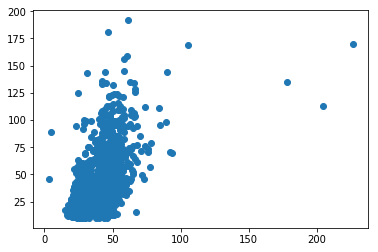

In [57]:
import matplotlib.pyplot as plt
plt.scatter(y_predict, y_test)

In [24]:
df[['male', 'age', 'fsize', 'marr', 'nettfa']]

,male,age,fsize,marr,nettfa
0,0,40,1,0,4.575
1,1,35,1,0,154.000
2,0,44,2,1,0.000
3,1,44,2,1,21.800
4,0,53,1,0,18.450
5,0,60,3,1,0.000
6,0,49,5,1,3.483
7,0,38,5,1,-2.100
8,0,52,2,1,5.290
9,1,45,1,0,29.600


In [ ]:
X = df[['male', 'age', 'fsize', 'marr', 'nettfa']]
y = df[['inc']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

%matplotlib inline

In [75]:
df2 = df[['male', 'age', 'fsize', 'marr', 'nettfa']]

In [76]:
df2.head()

,male,age,fsize,marr,nettfa
0,0,40,1,0,4.575
1,1,35,1,0,154.000
2,0,44,2,1,0.000
3,1,44,2,1,21.800
4,0,53,1,0,18.450


In [72]:
#KNN
colors = ['red', 'green', 'blue']
color_series = df2['incomepredict'].map(lambda s: colors[s])
plt.scatter(df2['marr'], df2['male'], color=color_series)

TypeError: list indices must be integers or slices, not str

In [ ]:
#Decision Trees


In [ ]:
#Bagged decision trees

In [ ]:
#Random Forest

In [ ]:
#Adaboost

In [ ]:
#Vector

##### 9. What is bootstrapping?

##### 10. What is the difference between a decision tree and a set of bagged decision trees? Be specific and precise!

##### 11. What is the difference between a set of bagged decision trees and a random forest? Be specific and precise!

##### 12. Why might a random forest be superior to a set of bagged decision trees?
> Hint: Consider the bias-variance tradeoff.

## Step 5: Evaluate the model. (Part 1: Regression Problem)

##### 13. Using RMSE, evaluate each of the models you fit on both the training and testing data.

##### 14. Based on training RMSE and testing RMSE, is there evidence of overfitting in any of your models? Which ones?

##### 15. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

##### 16. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

## Step 4: Model the data. (Part 2: Classification Problem)

Recall:
- Problem: Predict whether or not one is eligible for a 401k.
- When predicting `e401k`, you may use the entire dataframe if you wish.

##### 17. While you're allowed to use every variable in your dataframe, mention at least one disadvantage of using `p401k` in your model.

In [78]:
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [ ]:
One disadvantage of using p401k is that when we know if they already participate in a 401k we already know they are eligible, which makes for an unbalanced class. 

##### 18. List all modeling tactics we've learned that could be used to solve a classification problem (as of Wednesday afternoon of Week 6). For each tactic, identify whether it is or is not appropriate for solving this specific classification problem and explain why or why not.

In [ ]:
-logistic regression
-KNN
-decision tree

##### 19. Regardless of your answer to number 18, fit at least one of each of the following models to attempt to solve the classification problem above:
    - a logistic regression model
    - a k-nearest neighbors model
    - a decision tree
    - a set of bagged decision trees
    - a random forest
    - an Adaboost model
    - a support vector classifier
    
> As always, be sure to do a train/test split! In order to compare modeling techniques, you should use the same train-test split on each. I recommend using a random seed here.

> You may find it helpful to set up a pipeline to try each modeling technique, but you are not required to do so!

In [ ]:
#Logistic Regression

In [80]:
df.head()

,e401k,inc,marr,male,age,fsize,nettfa,p401k,pira,incsq,agesq
0,0,13.170,0,0,40,1,4.575,0,1,173.4489,1600
1,1,61.230,0,1,35,1,154.000,1,0,3749.1130,1225
2,0,12.858,1,0,44,2,0.000,0,0,165.3282,1936
3,0,98.880,1,1,44,2,21.800,0,0,9777.2540,1936
4,0,22.614,0,0,53,1,18.450,0,0,511.3930,2809


In [81]:
X2 = df[['male', 'age', 'fsize', 'marr', 'nettfa']]
y2 = df[['e401k']]

In [82]:
knn_X_train, knn_X_test, knn_y_train, knn_y_test = train_test_split(X2, y2, random_state=2)

In [83]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(knn_X_train)
X_test_sc = ss.transform(knn_X_test)

C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\taylo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [84]:
X_train_sc

array([[-0.50713328, -1.08359787,  0.72824968,  0.76713136, -0.39942396],
       [-0.50713328, -0.89020946,  0.07427282,  0.76713136, -0.47633019],
       [-0.50713328,  0.36681523, -1.2336809 , -1.30355771,  1.01206166],
       ...,
       [-0.50713328, -0.0199616 ,  0.72824968,  0.76713136, -0.31895985],
       [ 1.97186821, -0.98690367,  0.07427282,  0.76713136, -0.3217409 ],
       [-0.50713328, -0.40673843,  0.72824968, -1.30355771, -0.37922637]])

In [85]:
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn15 = KNeighborsClassifier(n_neighbors = 15)
knn25 = KNeighborsClassifier(n_neighbors = 25)

In [86]:
cross_val_score(knn3, X_train_sc, knn_y_train, cv=10).mean()

C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

0.6118406738024215

In [87]:
cross_val_score(knn25, X_train_sc, knn_y_train, cv=10).mean()

C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\taylo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y

0.6574129620263617

In [89]:
knn25.fit(X_train_sc, knn_y_train)
knn25.score(X_train_sc, knn_y_train)

C:\Users\taylo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


0.6821449108683151

In [90]:
knn25.score(X_test_sc, knn_y_test)

0.6722725312634756

In [91]:
knn3.fit(X_train_sc, knn_y_train)
[knn3.score(X_train_sc, knn_y_train), knn3.score(X_test_sc, knn_y_test)]

C:\Users\taylo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


[0.7901092581943646, 0.6244070720137991]

In [92]:
knn5.fit(X_train_sc, knn_y_train)
[knn5.score(X_train_sc, knn_y_train), knn5.score(X_test_sc, knn_y_test)]

C:\Users\taylo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


[0.7403680276020701, 0.6472617507546357]

In [93]:
knn15.fit(X_train_sc, knn_y_train)
[knn15.score(X_train_sc, knn_y_train), knn15.score(X_test_sc, knn_y_test)]

C:\Users\taylo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


[0.6922081656124209, 0.6554549374730487]

In [94]:
knn25.fit(X_train_sc, knn_y_train)
[knn5.score(X_train_sc, knn_y_train), knn5.score(X_test_sc, knn_y_test)]

C:\Users\taylo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


[0.7403680276020701, 0.6472617507546357]

In [ ]:
#KNN
colors = ['red', 'green', 'blue']
color_series = df2['incomepredict'].map(lambda s: colors[s])
plt.scatter(df2['marr'], df2['male'], color=color_series)

## Step 5: Evaluate the model. (Part 2: Classfication Problem)

##### 20. Suppose our "positive" class is that someone is eligible for a 401(k). What are our false positives? What are our false negatives?

##### 21. In this specific case, would we rather minimize false positives or minimize false negatives? Defend your choice.

##### 22. Suppose we wanted to optimize for the answer you provided in problem 21. Which metric would we optimize in this case?

##### 23. Suppose that instead of optimizing for the metric in problem 21, we wanted to balance our false positives and false negatives using `f1-score`. Why might [f1-score](https://en.wikipedia.org/wiki/F1_score) be an appropriate metric to use here?

##### 24. Using f1-score, evaluate each of the models you fit on both the training and testing data.

##### 25. Based on training f1-score and testing f1-score, is there evidence of overfitting in any of your models? Which ones?

##### 26. Based on everything we've covered so far, if you had to pick just one model as your final model to use to answer the problem in front of you, which one model would you pick? Defend your choice.

##### 27. Suppose you wanted to improve the performance of your final model. Brainstorm 2-3 things that, if you had more time, you would attempt.

## Step 6: Answer the problem.

##### BONUS: Briefly summarize your answers to the regression and classification problems. Be sure to include any limitations or hesitations in your answer.

- Regression: What features best predict one's income?
- Classification: Predict whether or not one is eligible for a 401k.